<a href="https://colab.research.google.com/github/TrunnMosby/Open-contributions/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HOW IS EDA PERFORMED ON DATASETS


In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving train.csv to train (1).csv


In [ ]:
import pandas as pd
import io
train=pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#CHECKING FOR NULL VALUES

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#DATA VISUALIZATION

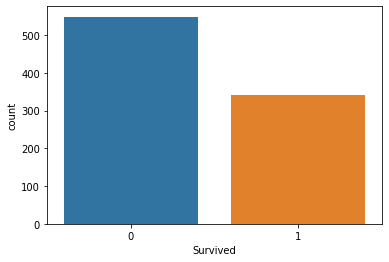

In [ ]:
import seaborn as sns
sns.countplot(x='Survived',data=train)

#So you can see around 550 people died and 350 survived


#So you can see the proportion of men and women who survived.

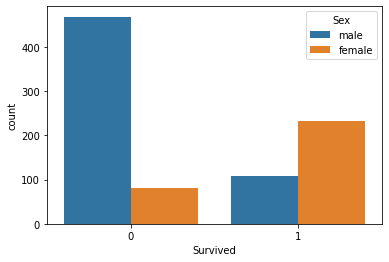

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=train)

#People who lived and died based on their class.

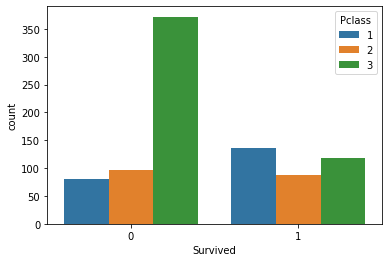

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=train)

#Count of people with different ages

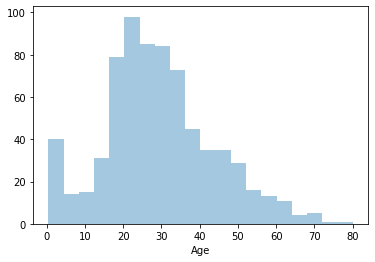

In [ ]:
sns.distplot(train['Age'].dropna(),kde=False)

#Fares paid

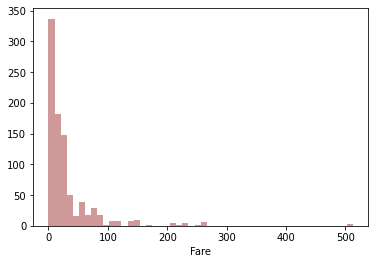

In [ ]:
sns.distplot(train['Fare'].dropna(),kde=False,color='darkred')

#Checking the correlation between variables.

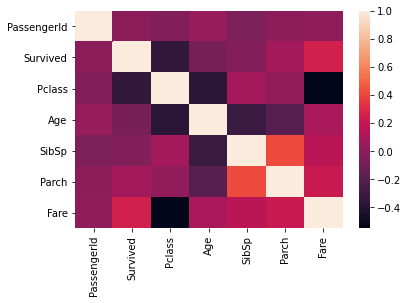

In [ ]:
sns.heatmap(train.corr())

#Checking the dependence of Pclass on Age


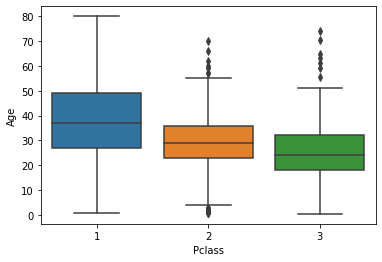

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [ ]:
#As you can see if the passenger belonged to 1st class his average age would be 38,if he/she belonged to 2nd class
# his average age woul be around 28 and if he is 3rd class passenger his/her age would be around 25.We can us this data to fill nan values

In [ ]:
for i in train['Pclass']:
  if(i==1):
    train['Age']=train['Age'].replace(np.NaN,38)
  if(i==2):
    train['Age']=train['Age'].replace(np.NaN,28)
  if(i==3):
    train['Age']=train['Age'].replace(np.NaN,25)

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#Count of people with different age groups after filling the NaN values

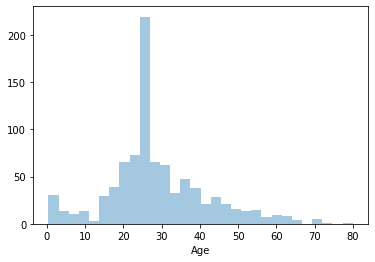

In [ ]:
sns.distplot(train['Age'],kde=False)

In [ ]:
#Dropping the Cabin column as it has too many null values
train=train.drop('Cabin',axis=1)


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#Applying label encoding to Categorical features

In [ ]:
train['Embarked']=train['Embarked'].ffill()

In [ ]:

train['Embarked']=train['Embarked'].map({'S':0, 'C':1, 'Q':2})


In [ ]:
train['Sex']=train['Sex'].map({'male':0,'female':1})

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


#Here we have completed the EDA part now we can fit train our model

In [ ]:

Labels=train['Survived']
features=train.drop(['Name','Ticket','Survived'],axis=1)

In [ ]:
features.shape


(891, 8)

In [ ]:
Labels.shape

(891,)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,Labels,test_size=0.3)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rmodel=RandomForestClassifier()
rmodel.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rmodel.score(xtest,ytest)

0.8171641791044776